#	Citizen Participation and Digital Inclusion in E-Government Platform (petition.parliament.uk)

During our data exploration, we identified two separate petition datasets maintained by the UK Government: 

- Current platform contains petitions from approximately 6 month ago to the present
- Archived platform holds over 52,000 petitions from the 2010–2024 period. 





________READ THE TEXT BELOW SOMEONE!!________________


We found that the UK Government actually runs two separate petition platforms — one current and one archived. The archived version includes over 50,000 petitions from 2010 to 2024, which is great in terms of volume and history. But it doesn't include open petitions anymore, and we can't access structured data like government responses or real-time status updates. Since our project is about how people engage with the current platform, and we’re aiming to give practical recommendations for improving it, we decided to focus on the live petition site. It gives us everything we need — like petition status, signature thresholds, and whether a petition got an official response — and it fits our research questions and audience much better.



## Import + Load

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#active petitions
df = pd.read_csv("petitions-live.csv")

#submitted during the 2010-2024 parliament
#df = pd.read_csv("petitions-archive.csv")
df.head(7)

,Petition,URL,State,Signatures Count
0,Fund reconstruction surgery and psychosexual t...,https://petition.parliament.uk/petitions/700001,closed,939
1,Apply for the UK to join the European Union as...,https://petition.parliament.uk/petitions/700005,closed,136652
2,Rejoin the European Union,https://petition.parliament.uk/petitions/700006,rejected,10
3,Require dating apps to ensure ID and DBS check...,https://petition.parliament.uk/petitions/700007,open,1216
4,"Fund Covid booster vaccines for all, with prio...",https://petition.parliament.uk/petitions/700009,open,710
5,Only allow alcohol to be sold in pubs and in w...,https://petition.parliament.uk/petitions/700010,open,89
6,Donate migrant boats to Ukraine,https://petition.parliament.uk/petitions/700011,open,436


## Basic Information

In [72]:
print(f"Total petitions: {len(df)}")

df["State"].value_counts()

Total petitions: 4393


State
rejected    2545
open        1840
closed         8
Name: count, dtype: int64

## Petitions showcase

In [73]:
most_signed = df.sort_values("Signatures Count", ascending=False).iloc[0]
least_signed = df[df["Signatures Count"] > 0].sort_values("Signatures Count").iloc[0]

print("🔹 Most Popular Petition:")
print(f"Title: {most_signed['Petition']}")
print(f"Signatures: {most_signed['Signatures Count']}")
print(f"URL: {most_signed['URL']}")

print("\n🔹 Least Popular Petition (as of now):")
print(f"Title: {least_signed['Petition']}")
print(f"Signatures: {least_signed['Signatures Count']}")
print(f"URL: {least_signed['URL']}")

🔹 Most Popular Petition:
Title: Call a General Election
Signatures: 3078089
URL: https://petition.parliament.uk/petitions/700143

🔹 Least Popular Petition (as of now):
Title: We want Keith FC to be included in scorewars instead of the blatant ignoring.
Signatures: 4
URL: https://petition.parliament.uk/petitions/702540


## Petition Status

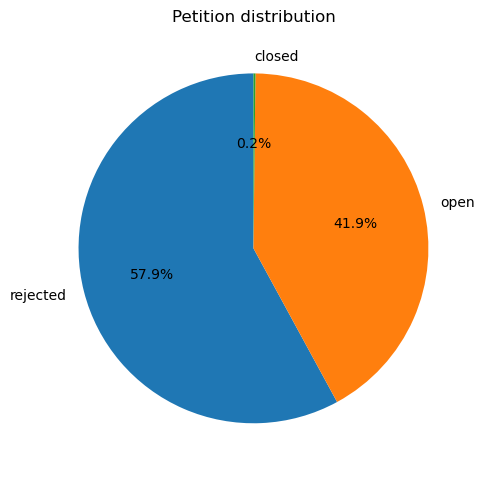

In [74]:
df["State"].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    figsize=(5,5), 
    title="Petition distribution"
)
plt.ylabel("")
plt.tight_layout()
plt.show()

## Signature Count Distribution

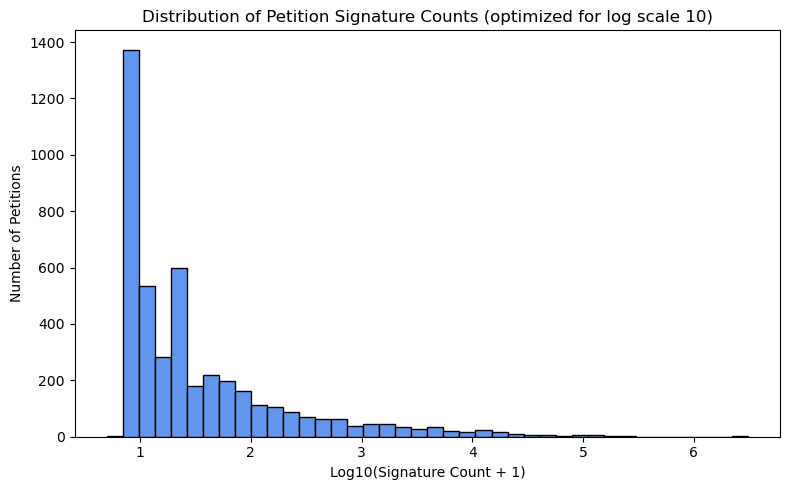

In [75]:
df["Log Signature Count"] = np.log10(df["Signatures Count"] + 1)

plt.figure(figsize=(8, 5))
plt.hist(df["Log Signature Count"], bins=40, color='cornflowerblue', edgecolor='black')
plt.title("Distribution of Petition Signature Counts (optimized for log scale 10)")
plt.xlabel("Log10(Signature Count + 1)")
plt.ylabel("Number of Petitions")
plt.tight_layout()
plt.show()
#10^1 = 10 signatures
#10^2 = 100 signatures
#10^5 = 100000 signatures
#and so on...

##  Top Petitions

In [76]:
df.sort_values("Signatures Count", ascending=False).head()

,Petition,URL,State,Signatures Count,Log Signature Count
57,Call a General Election,https://petition.parliament.uk/petitions/700143,open,3078089,6.488281
819,Raise the income tax personal allowance from £...,https://petition.parliament.uk/petitions/702844,open,248404,5.395160
1152,Ban immediately the use of dogs in scientific ...,https://petition.parliament.uk/petitions/705384,open,238773,5.377987
298,Close the borders! Suspend ALL immigration for...,https://petition.parliament.uk/petitions/700824,open,227764,5.357487
282,Introduce a compensation scheme for WASPI women,https://petition.parliament.uk/petitions/700765,open,161557,5.208328
